## Análisis Exploratorio de Datos (EDA)

Estaremo realizando una exploración y análisis inicial del conjunto de datos cleaned_dataset. Este archivo fue almacenado en GitHub para facilitar el acceso y la colaboración.

#### Importar librerías

In [1]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
from scipy.stats import mode #Biblioteca de Python para matemáticas, ciencia e ingeniería
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python
from collections import Counter #Es una clase que facilita el conteo de elementos en una colección

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### Carga del archivo

In [2]:
url = 'https://raw.githubusercontent.com/JohannaRangel/ML_MarketAnalysis-AutomotrizChina/main/data/cleaned_dataset.csv'

try:
    cars = pd.read_csv(url, encoding='utf-8')
    print("El archivo se abrió correctamente con UTF-8.")
    cars.head()
except UnicodeDecodeError:
    print("Error: No se pudo abrir el archivo con UTF-8. Intenta con otra codificación.")

El archivo se abrió correctamente con UTF-8.


#### Vista previa rápida de los primeros registros

In [3]:
cars.head()

,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


#### Distribución estadística de las variables numéricas

In [4]:
print(cars.describe())

           car_id  door_number  wheel_base  car_length   car_width  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean   103.000000     3.121951   98.756585  174.049268   65.907805   
std     59.322565     0.994966    6.021776   12.337289    2.145204   
min      1.000000     2.000000   86.600000  141.100000   60.300000   
25%     52.000000     2.000000   94.500000  166.300000   64.100000   
50%    103.000000     4.000000   97.000000  173.200000   65.500000   
75%    154.000000     4.000000  102.400000  183.100000   66.900000   
max    205.000000     4.000000  120.900000  208.100000   72.300000   

       car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
count  205.000000   205.000000       205.000000   205.000000  205.000000   
mean    53.724878  2555.565854         4.419512   126.907317    3.329756   
std      2.443522   520.680204         1.441544    41.642693    0.270844   
min     47.800000  1488.000000         2.000000    61.000000    2

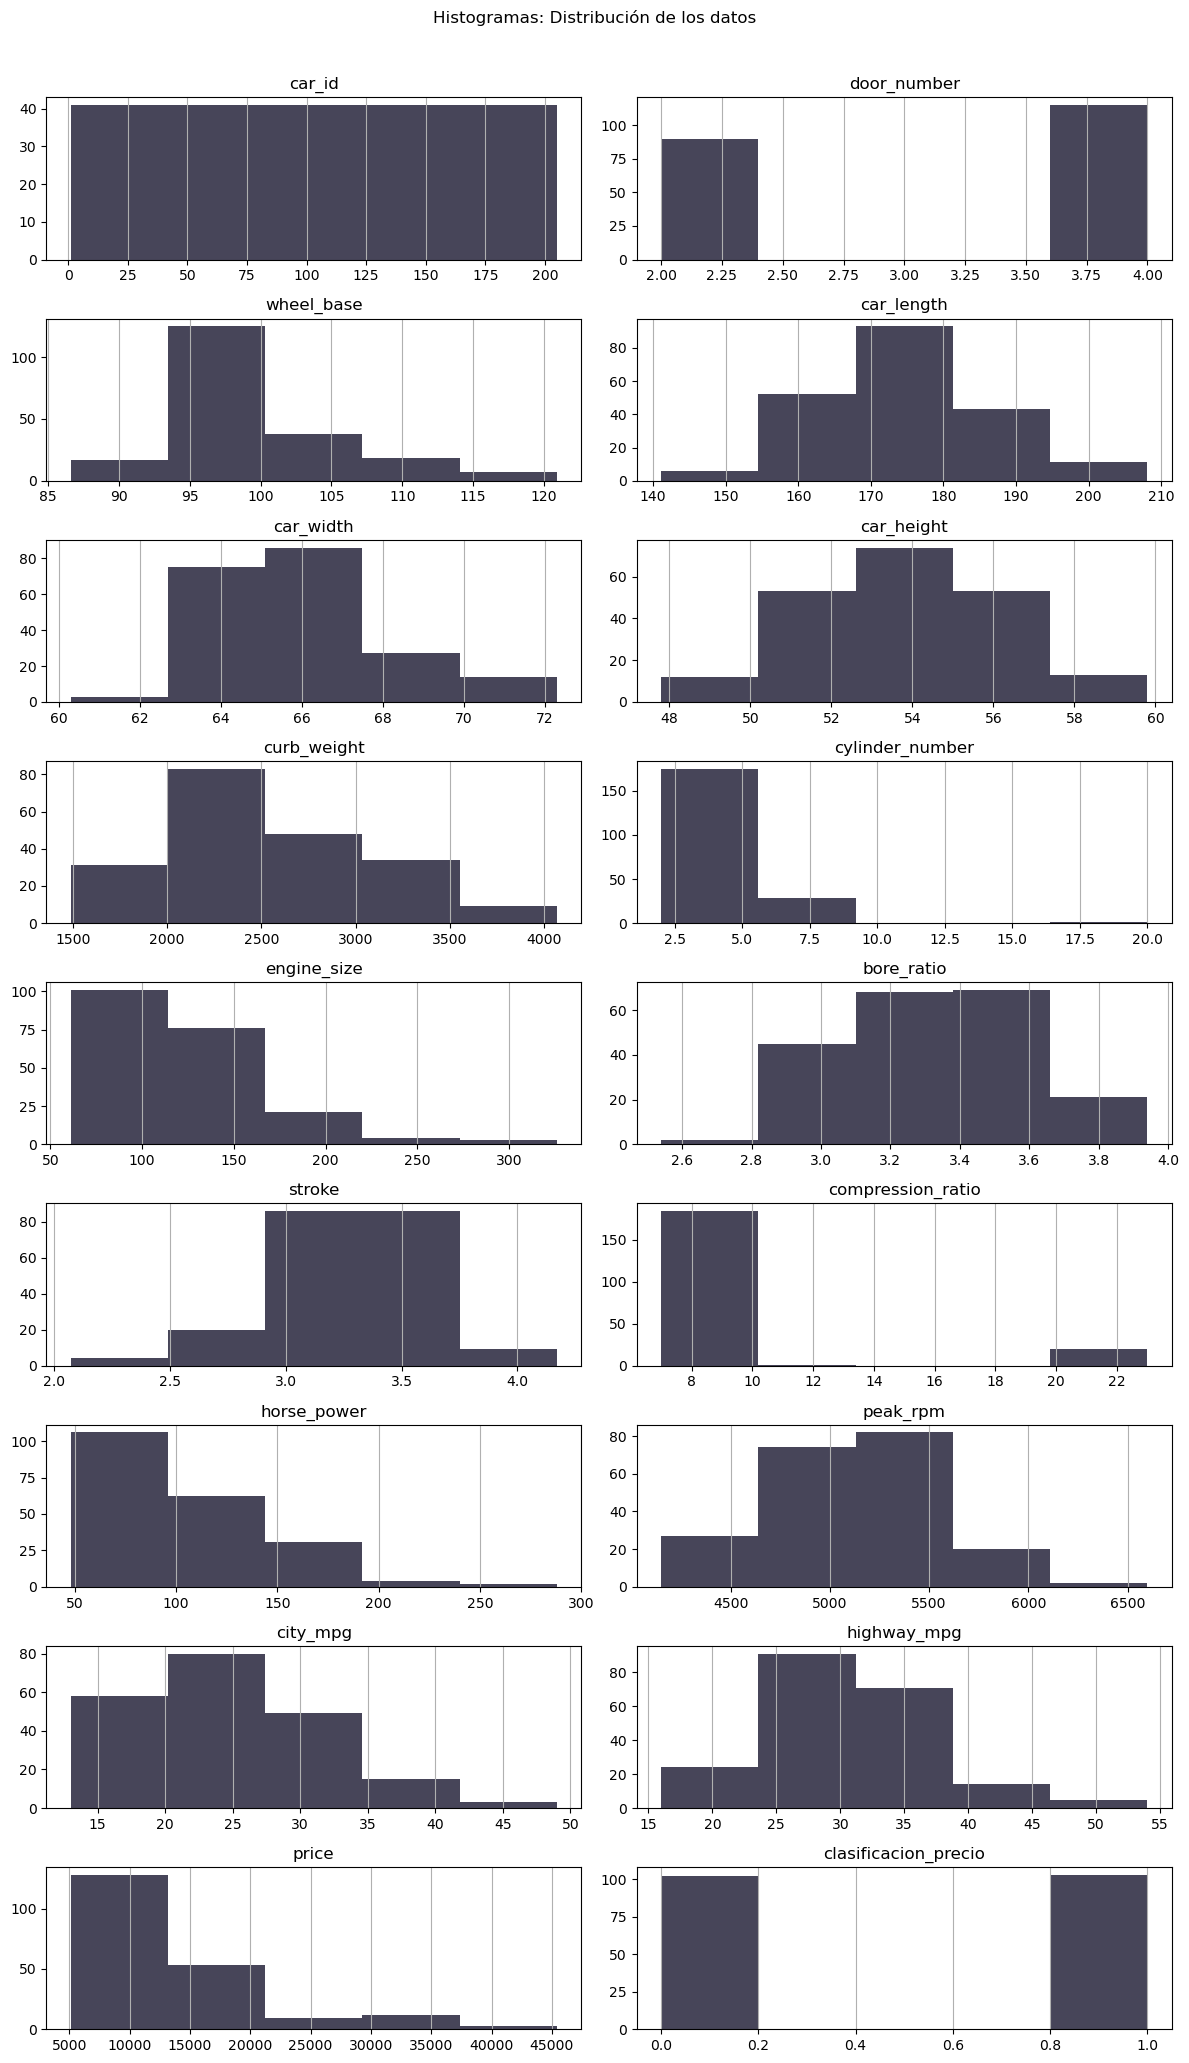

In [5]:
# Define la figura y los ejes para subgráficos
fig, axes = plt.subplots(9, 2, figsize=(12, 21))
fig.suptitle("Histogramas: Distribución de los datos", fontsize=12)

# Itera sobre las columnas numéricas y crea histogramas en los subgráficos correspondientes
for i, (col, ax) in enumerate(zip(cars.select_dtypes(include=np.number).columns, axes.flatten())):
    cars[col].hist(ax=ax, bins=5, color='#474559')
    ax.set_title(col)
    ax.yaxis.grid(False)  # Desactiva las líneas horizontales de la cuadrícula en el eje y

# Ajusta la disposición
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Ajusta rect para dejar espacio para el título
plt.show()


#### Distribución de Variables Categóricas

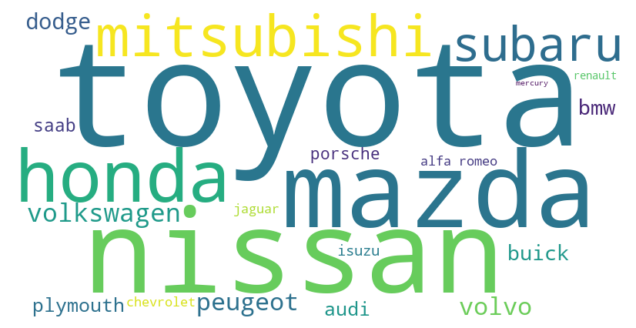

In [5]:
# Contar la frecuencia de cada marca
marca_counts = Counter(cars['marca'].astype(str).tolist())

# Crear una función para generar nubes de palabras con frecuencia
def generate_wordcloud_with_frequency(text_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_counts)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generar nube de palabras para la columna 'marca'
generate_wordcloud_with_frequency(marca_counts)


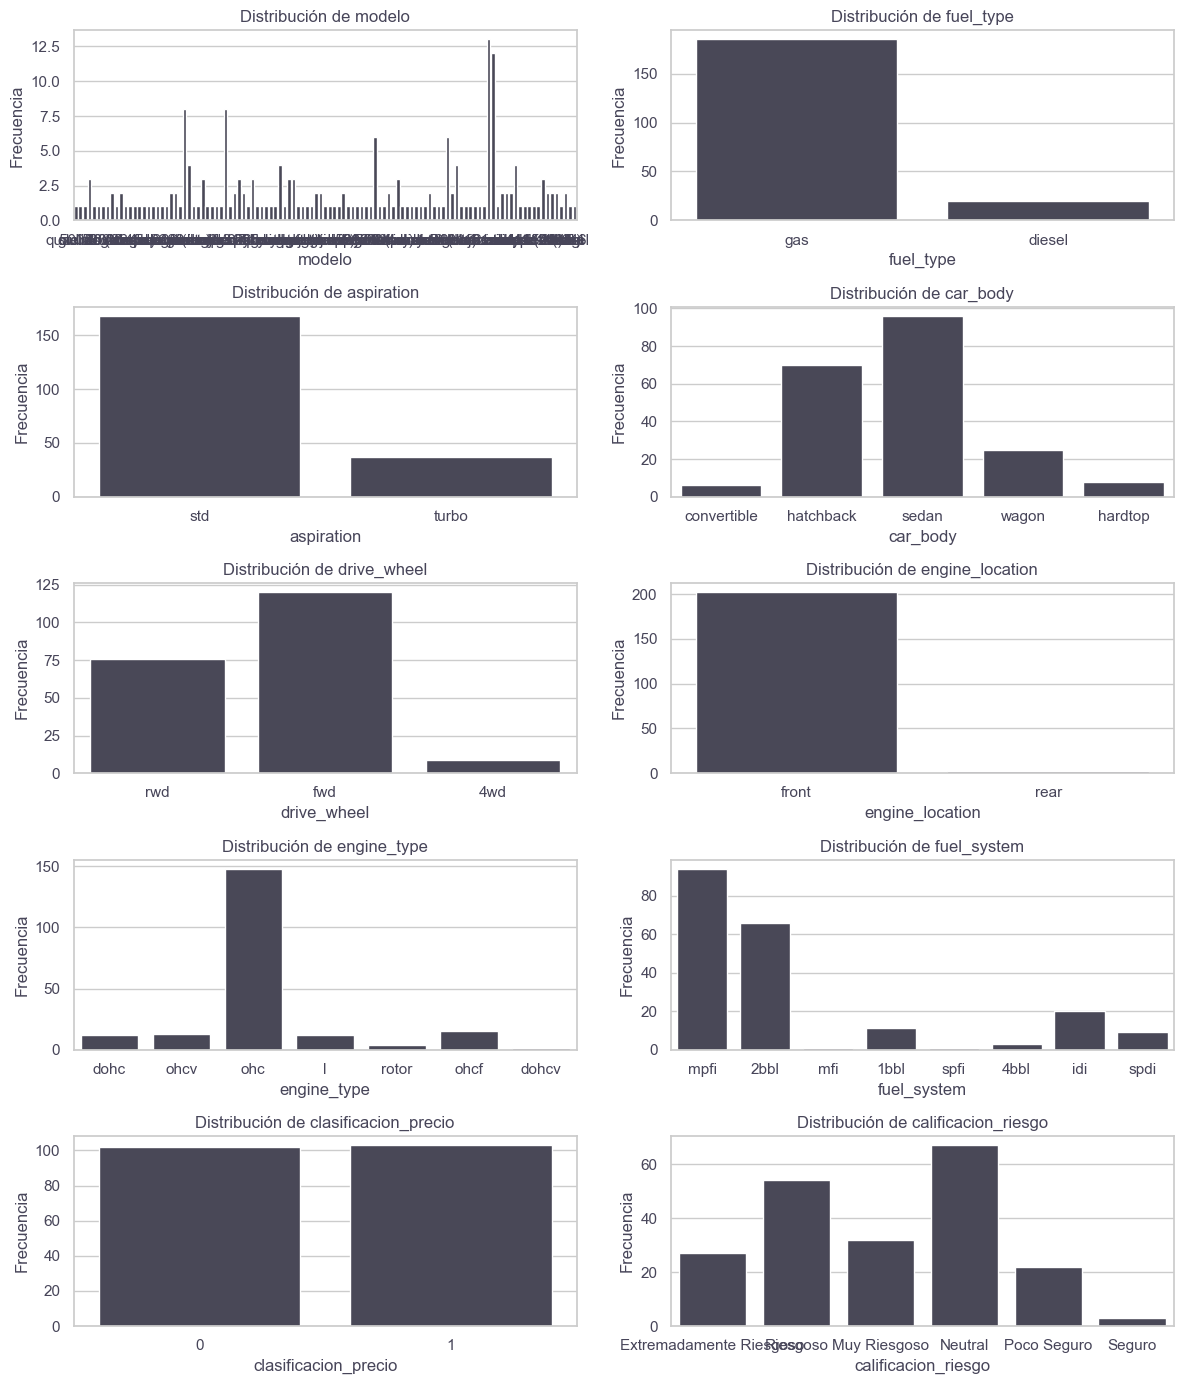

In [16]:
# Establecer el color principal
color_principal = '#474559'

# Lista de variables categóricas que deseas visualizar
variables_categoricas = ['modelo', 'fuel_type', 'aspiration', 'car_body', 
                         'drive_wheel', 'engine_location', 'engine_type',
                         'fuel_system', 'clasificacion_precio', 'calificacion_riesgo']

# Establecer el fondo de los gráficos
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 14))

# Iterar sobre las variables categóricas y generar gráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(5, 2, i)  # Cambia el número de subgráficos según sea necesario
    sns.countplot(x=variable, data=cars, color=color_principal)
    plt.title(f'Distribución de {variable}', color=color_principal)
    plt.xlabel(variable, color=color_principal)
    plt.ylabel('Frecuencia', color=color_principal)
    plt.tick_params(axis='x', labelcolor=color_principal)
    plt.tick_params(axis='y', labelcolor=color_principal)

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()


#### Análisis univariable: 'Price'

La variable 'Price' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento

In [14]:
# Resumen de estadística descriptiva
cars['price'].describe()

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

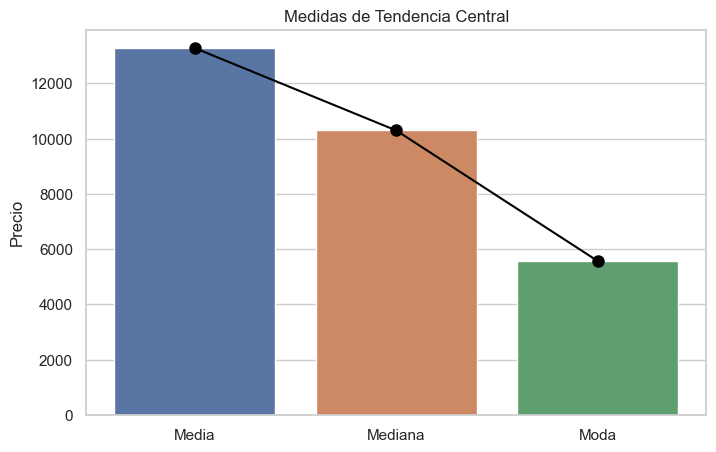

In [42]:
# Calcular medidas de tendencia central
sns.set(style="whitegrid")

mean_value = cars['price'].mean()
median_value = cars['price'].median()
mode_value = mode(cars['price']).mode[0]

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=['Media', 'Mediana', 'Moda'], y=[mean_value, median_value, mode_value])

# Añadir líneas para conectar las medidas
plt.plot([0, 1, 2], [mean_value, median_value, mode_value], marker='o', markersize=8, color='black')

# Configurar etiquetas
plt.title('Medidas de Tendencia Central')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

In [18]:
#Medidas de Dispersión
range_value = cars['price'].max() - cars['price'].min()
# Imprimir el valor del rango
print(f'Rango: {range_value}')


Rango: 40282


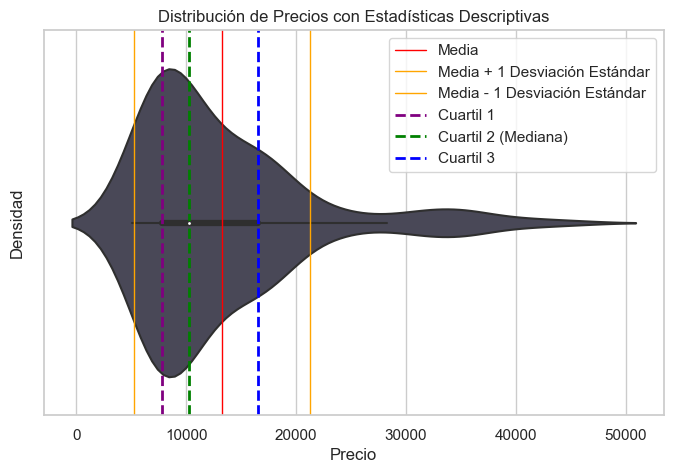

In [43]:
sns.set(style="whitegrid")

# Crear un gráfico de violín para visualizar la distribución de precios
plt.figure(figsize=(8, 5))
sns.violinplot(x=cars['price'],color='#474559')

# Añadir líneas para la media y las desviaciones estándar
plt.axvline(mean_value, color='red',linewidth=1, label='Media')
plt.axvline(mean_value + std_dev_value, color='orange', linewidth=1, label='Media + 1 Desviación Estándar')
plt.axvline(mean_value - std_dev_value, color='orange', linewidth=1, label='Media - 1 Desviación Estándar')

# Añadir líneas para los cuartiles
plt.axvline(quartiles.loc[0.25], color='purple', linestyle='dashed', linewidth=2, label='Cuartil 1')
plt.axvline(quartiles.loc[0.5], color='green', linestyle='dashed', linewidth=2, label='Cuartil 2 (Mediana)')
plt.axvline(quartiles.loc[0.75], color='blue', linestyle='dashed', linewidth=2, label='Cuartil 3')

# Configurar etiquetas y leyenda
plt.title('Distribución de Precios con Estadísticas Descriptivas')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [35]:
# Asimetría y curtosis
print("Skewness: %f" % cars['price'].skew())
print("Kurtosis: %f" % cars['price'].kurt())

Skewness: 1.777678
Kurtosis: 3.051651


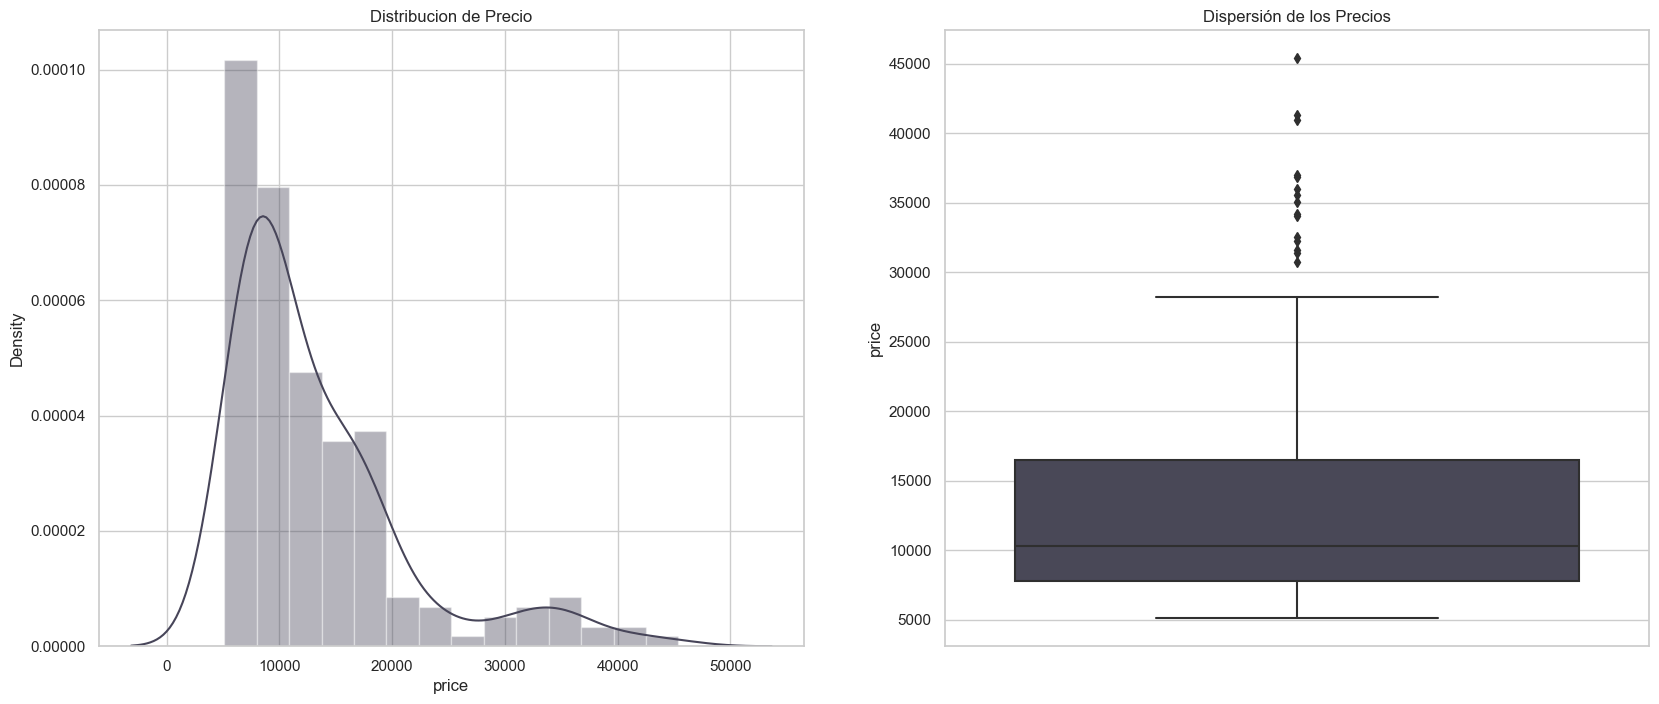

In [61]:
plt.figure(figsize=(20,8))

# Establecer el fondo de los gráficos
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.title('Distribucion de Precio')
sns.distplot(cars['price'], color= '#474559')

plt.subplot(1,2,2)
plt.title('Dispersión de los Precios')
sns.boxplot(y=cars.price, color= '#474559')

plt.show()

###### Relación de Price con variables numéricas

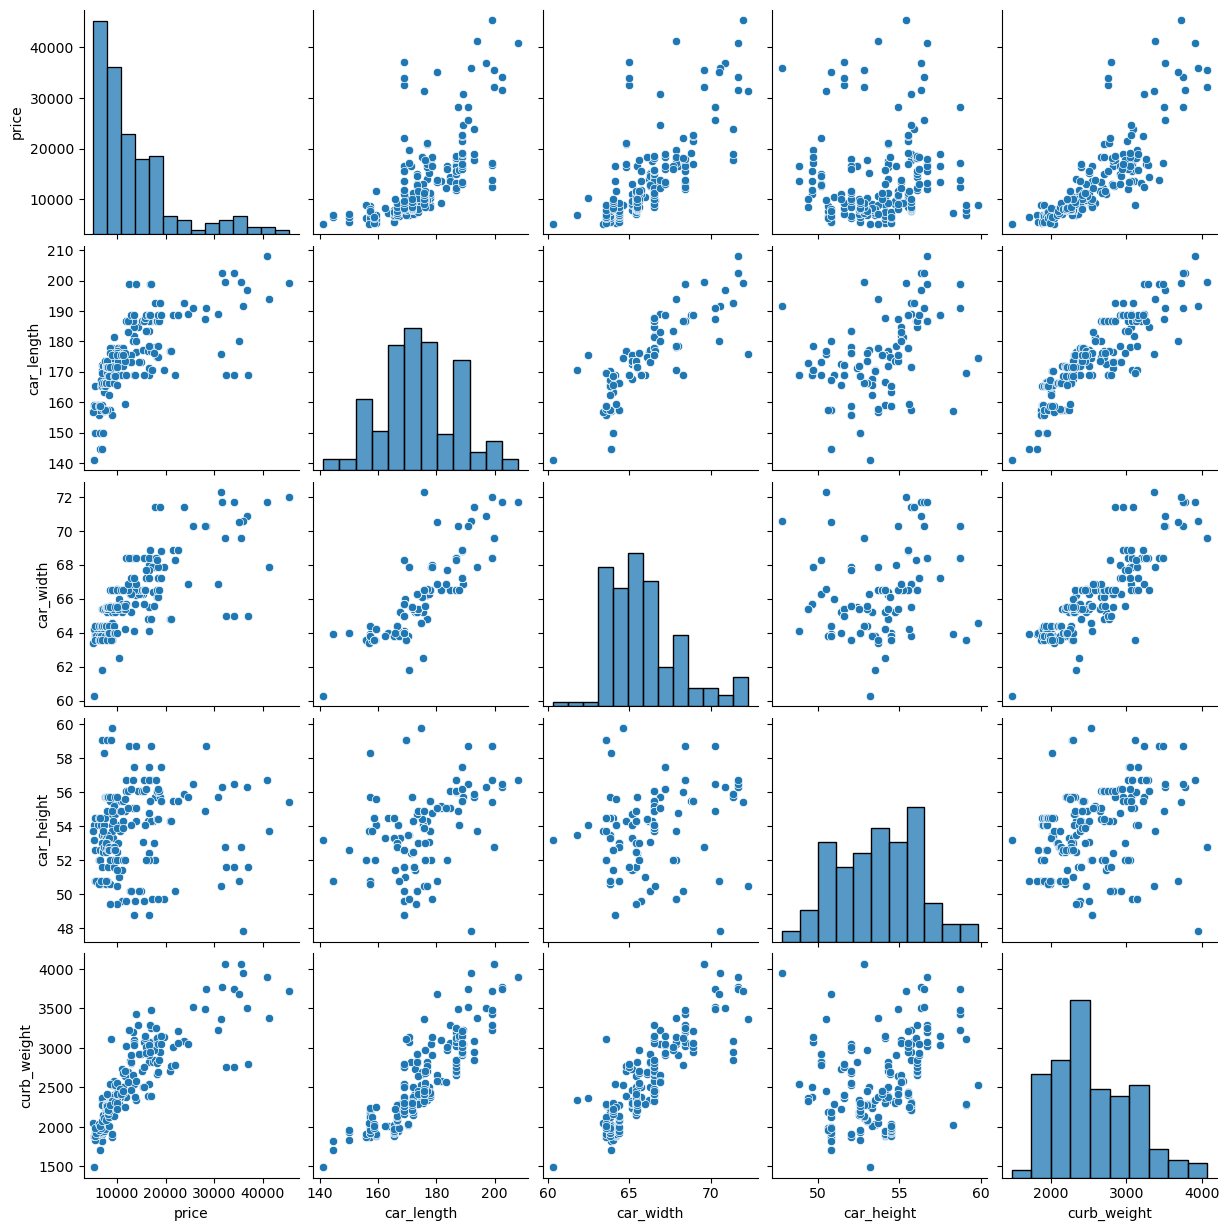

In [48]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'car_length', 'car_width', 'car_height', 'curb_weight']
sns.pairplot(cars[cols], height=2.5)
plt.show()

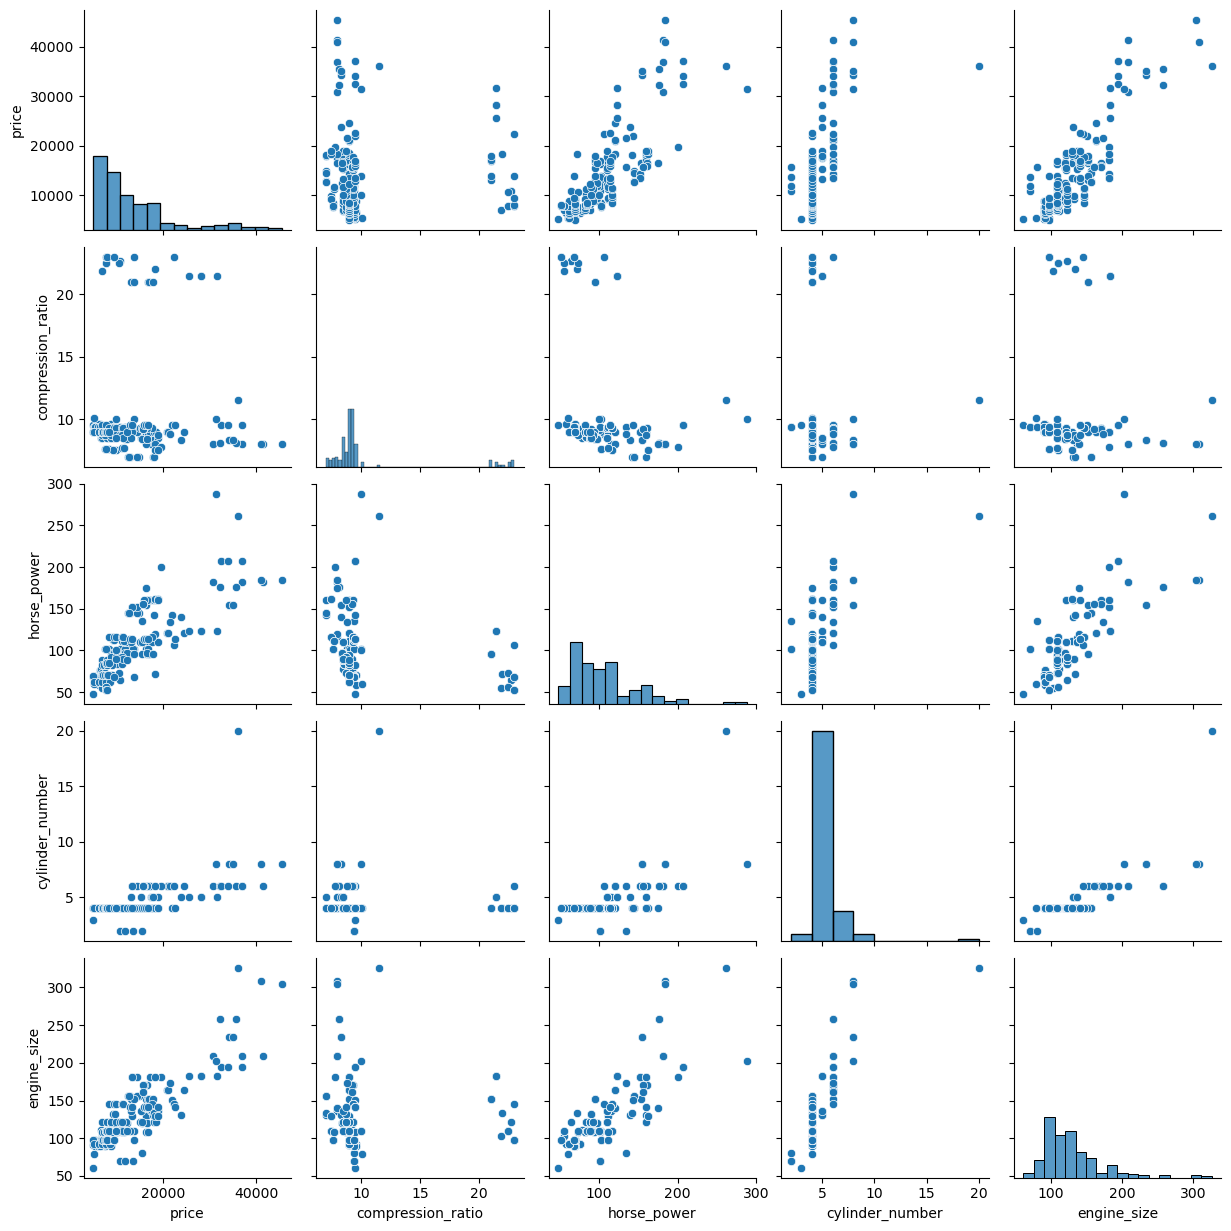

In [54]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'compression_ratio', 'horse_power', 'cylinder_number', 'engine_size']
sns.pairplot(cars[cols], height=2.5)
plt.show()

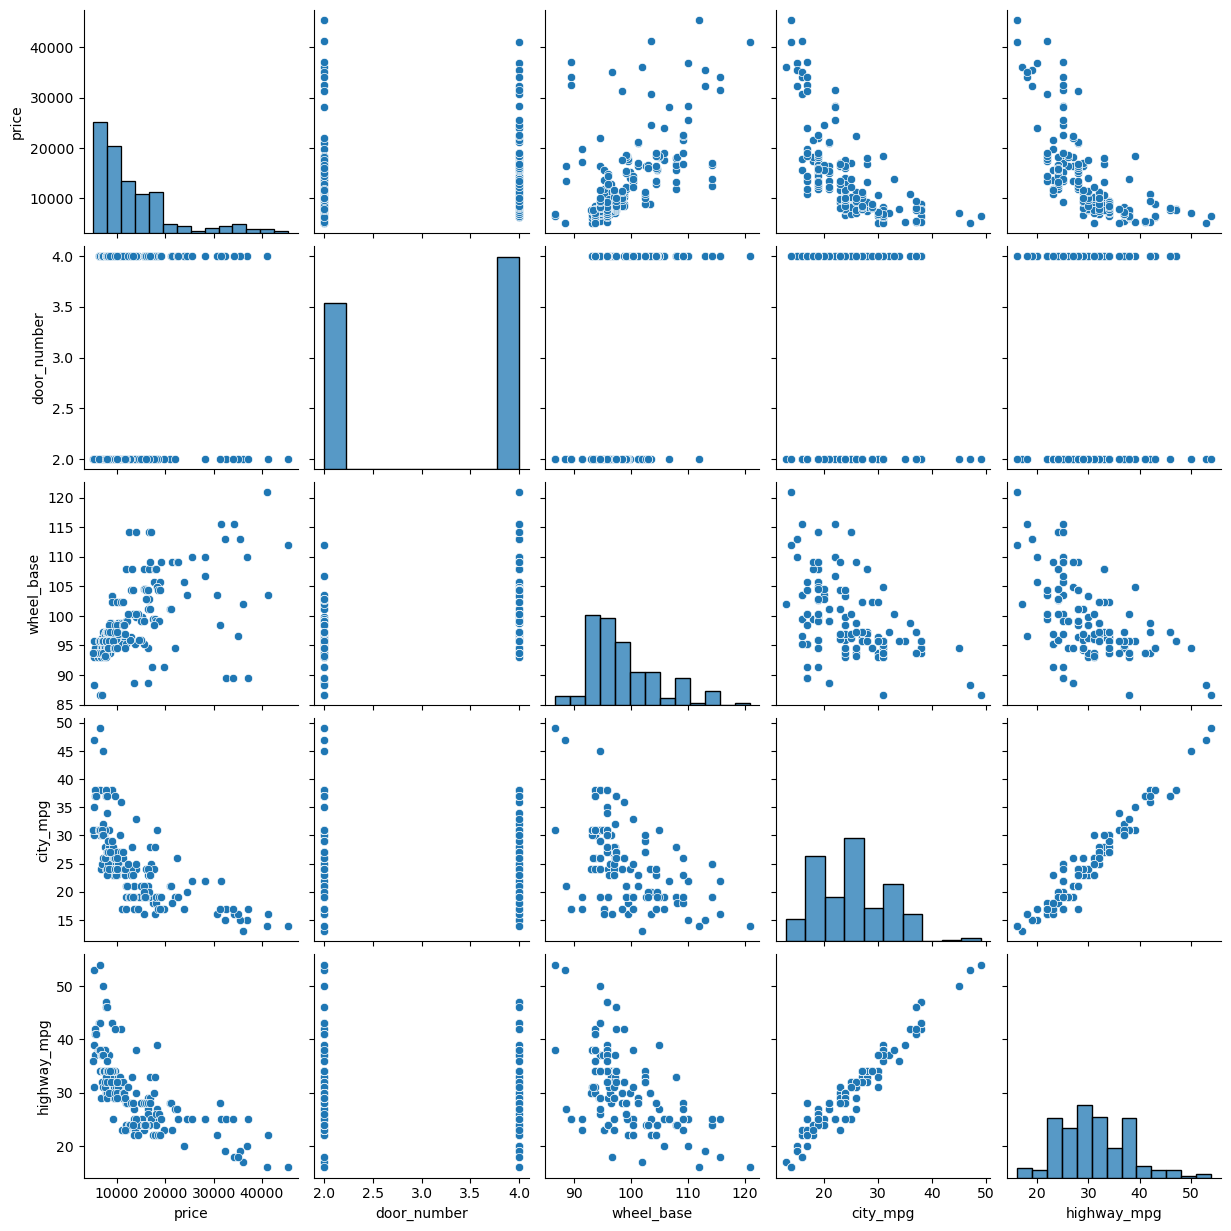

In [55]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'door_number', 'wheel_base', 'city_mpg', 'highway_mpg']
sns.pairplot(cars[cols], height=2.5)
plt.show()

###### Relación de Price con variables categóricas

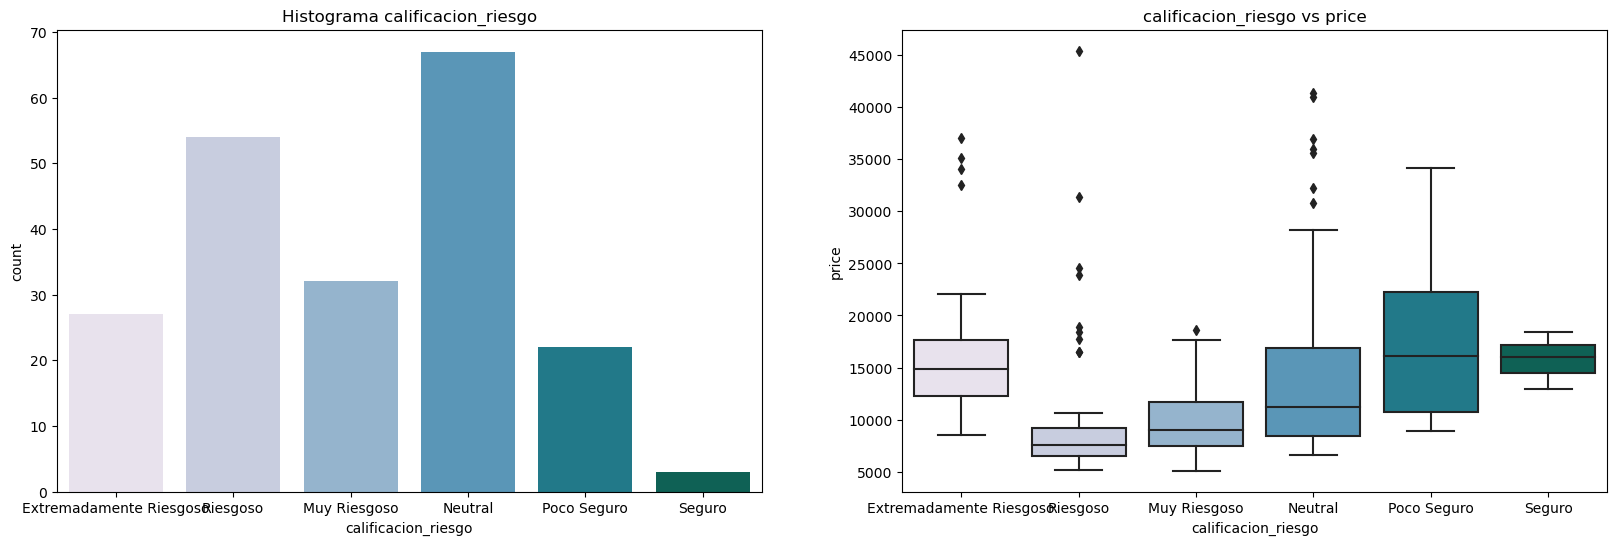

In [36]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma calificacion_riesgo')
sns.countplot(data=cars, x='calificacion_riesgo', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('calificacion_riesgo vs price')
sns.boxplot(x=cars.calificacion_riesgo, y=cars.price, palette="PuBuGn")

plt.show()

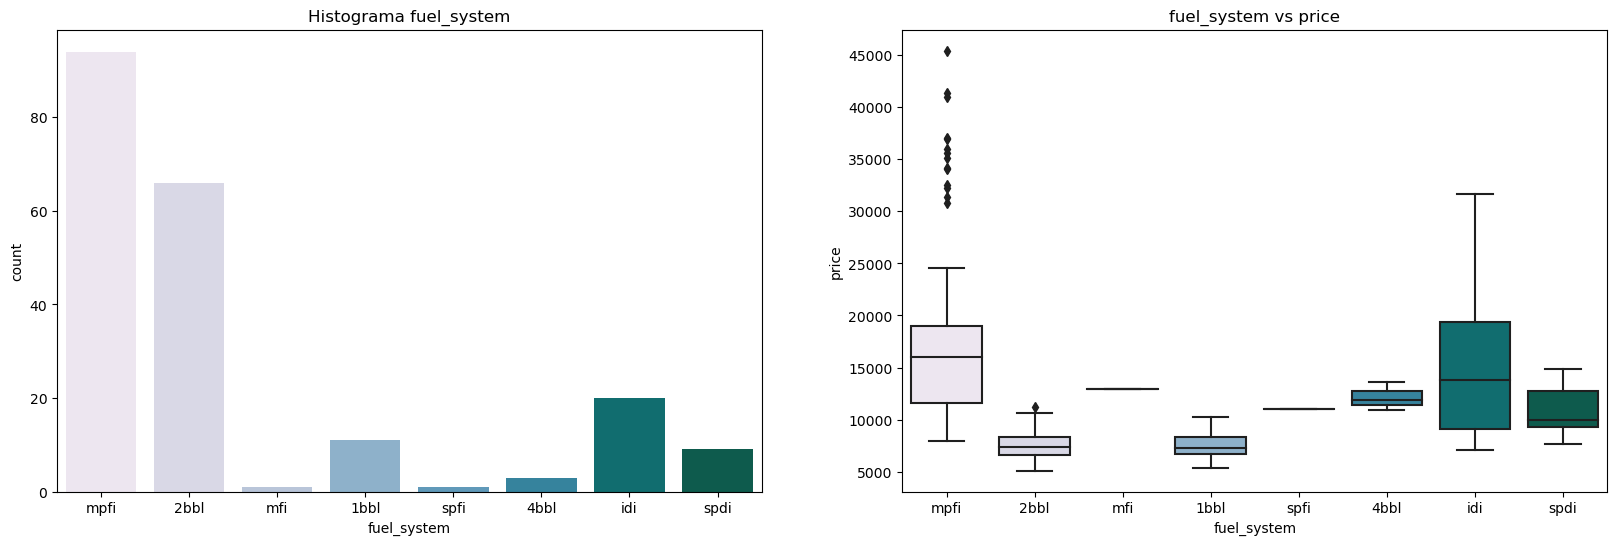

In [37]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma fuel_system')
sns.countplot(data=cars, x='fuel_system', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('fuel_system vs price')
sns.boxplot(x=cars.fuel_system, y=cars.price, palette="PuBuGn")

plt.show()

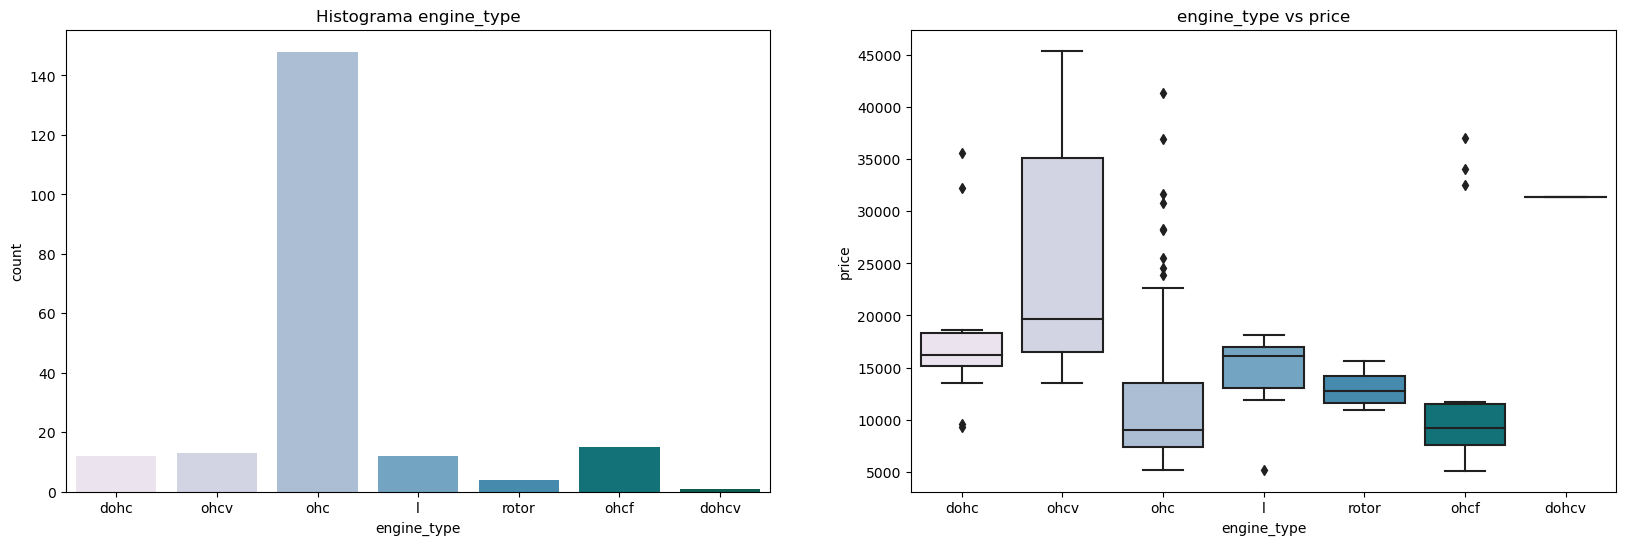

In [38]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma engine_type')
sns.countplot(data=cars, x='engine_type', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('engine_type vs price')
sns.boxplot(x=cars.engine_type, y=cars.price, palette="PuBuGn")

plt.show()

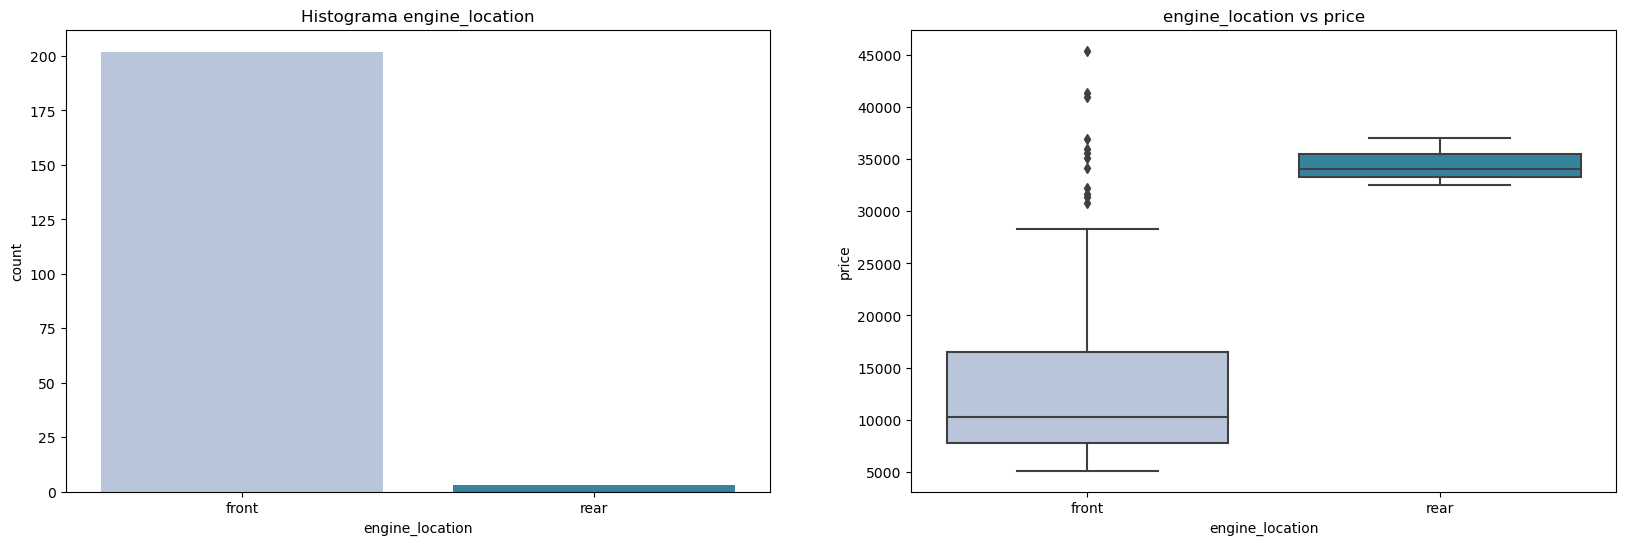

In [39]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma engine_location')
sns.countplot(data=cars, x='engine_location', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('engine_location vs price')
sns.boxplot(x=cars.engine_location, y=cars.price, palette="PuBuGn")

plt.show()

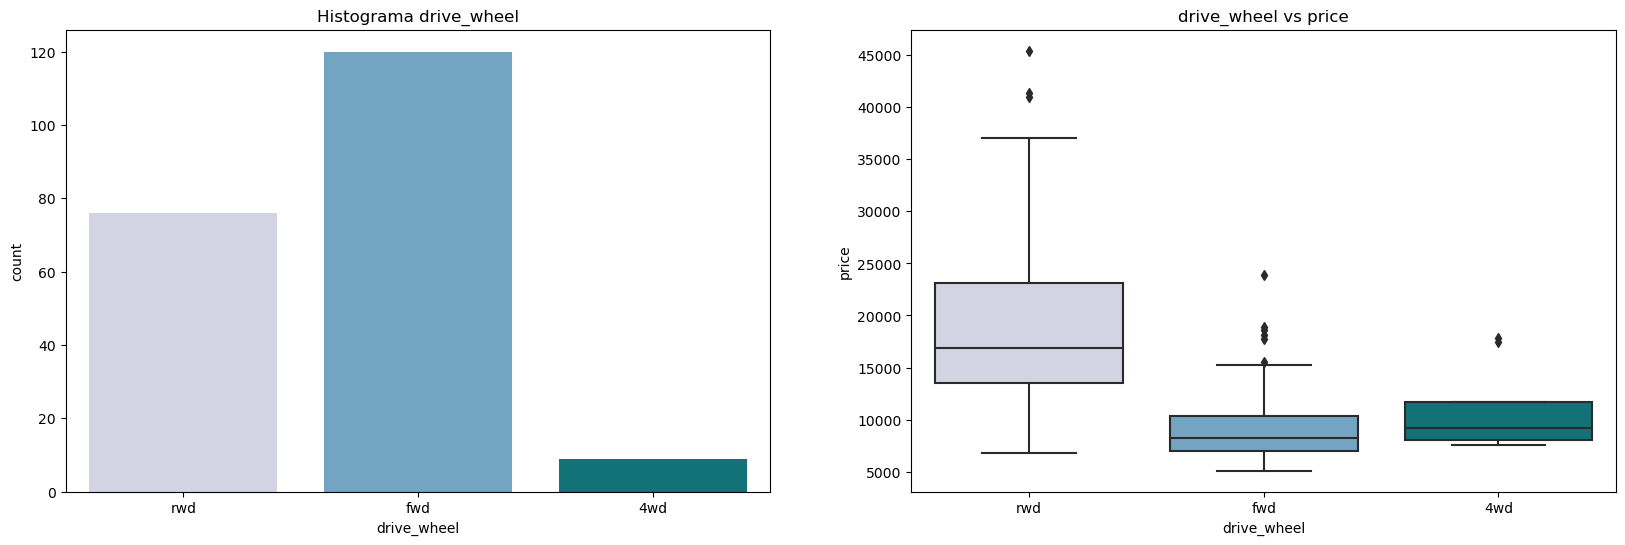

In [40]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma drive_wheel')
sns.countplot(data=cars, x='drive_wheel', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('drive_wheel vs price')
sns.boxplot(x=cars.drive_wheel, y=cars.price, palette="PuBuGn")

plt.show()

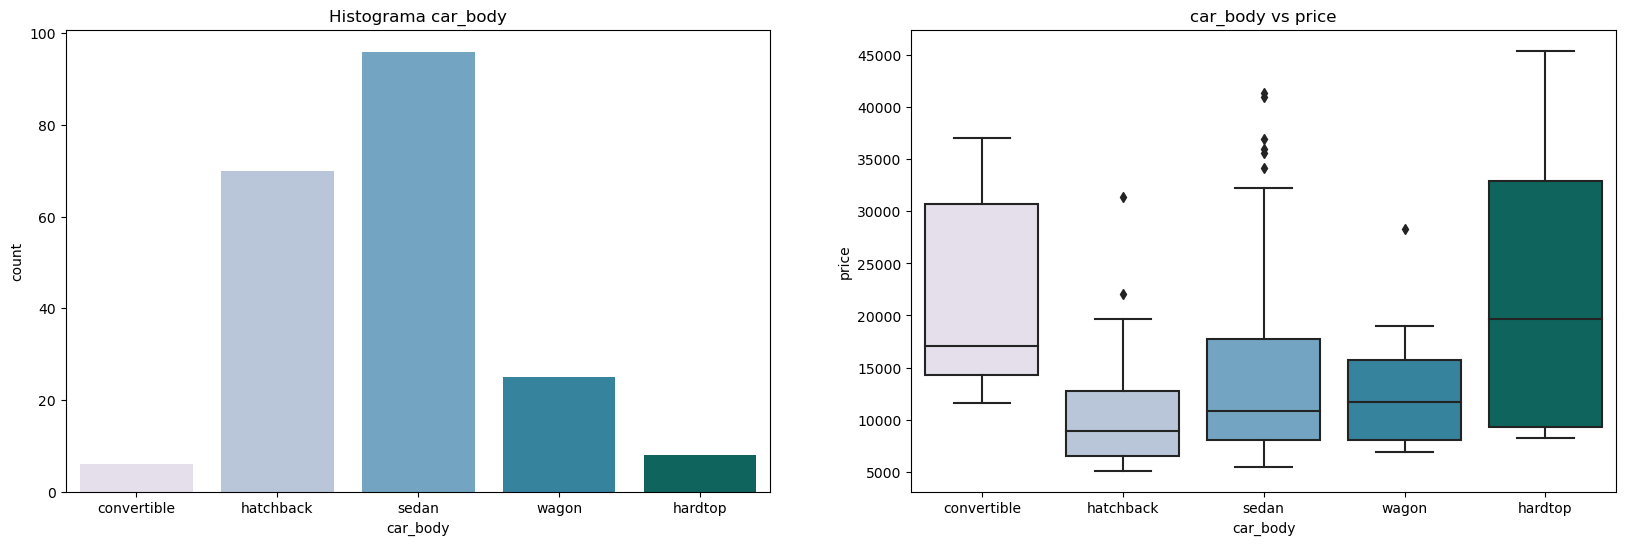

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma car_body')
sns.countplot(data=cars, x='car_body', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('car_body vs price')
sns.boxplot(x=cars.car_body, y=cars.price, palette="PuBuGn")

plt.show()

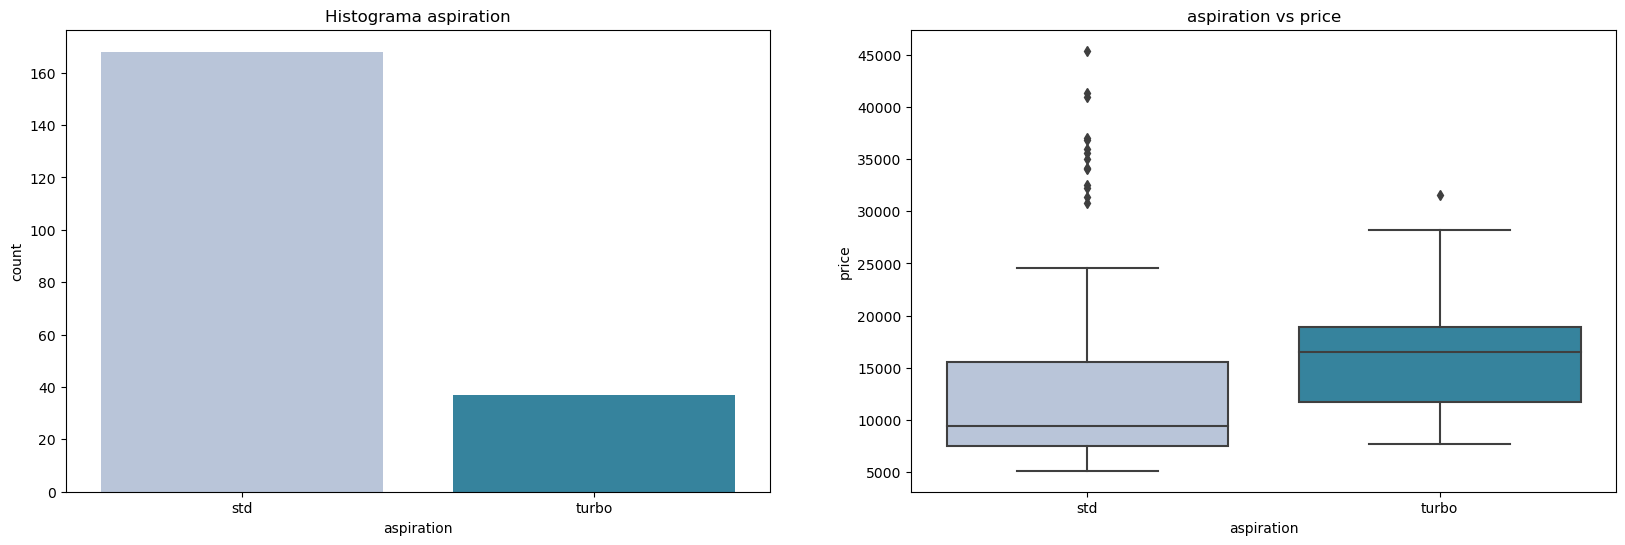

In [42]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma aspiration')
sns.countplot(data=cars, x='aspiration', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('aspiration vs price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette="PuBuGn")

plt.show()

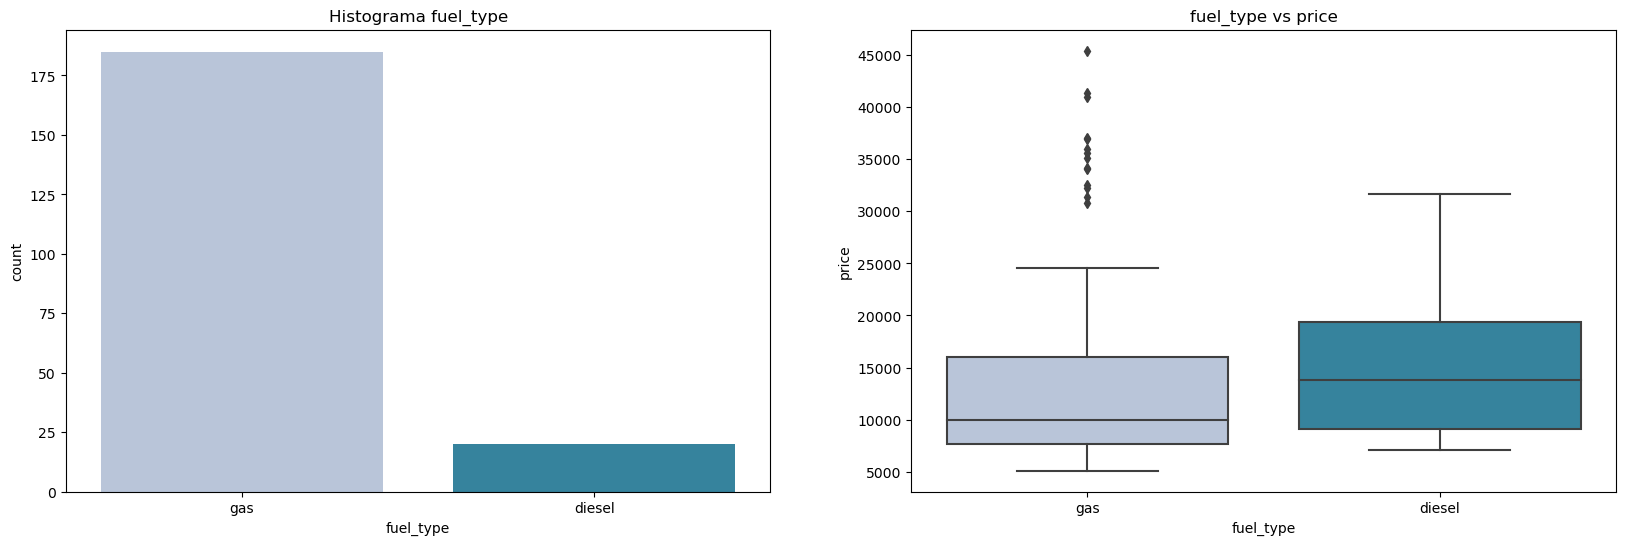

In [43]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma fuel_type')
sns.countplot(data=cars, x='fuel_type', palette="PuBuGn")

plt.subplot(1, 2, 2)
plt.title('fuel_type vs price')
sns.boxplot(x=cars.fuel_type, y=cars.price, palette="PuBuGn")

plt.show()

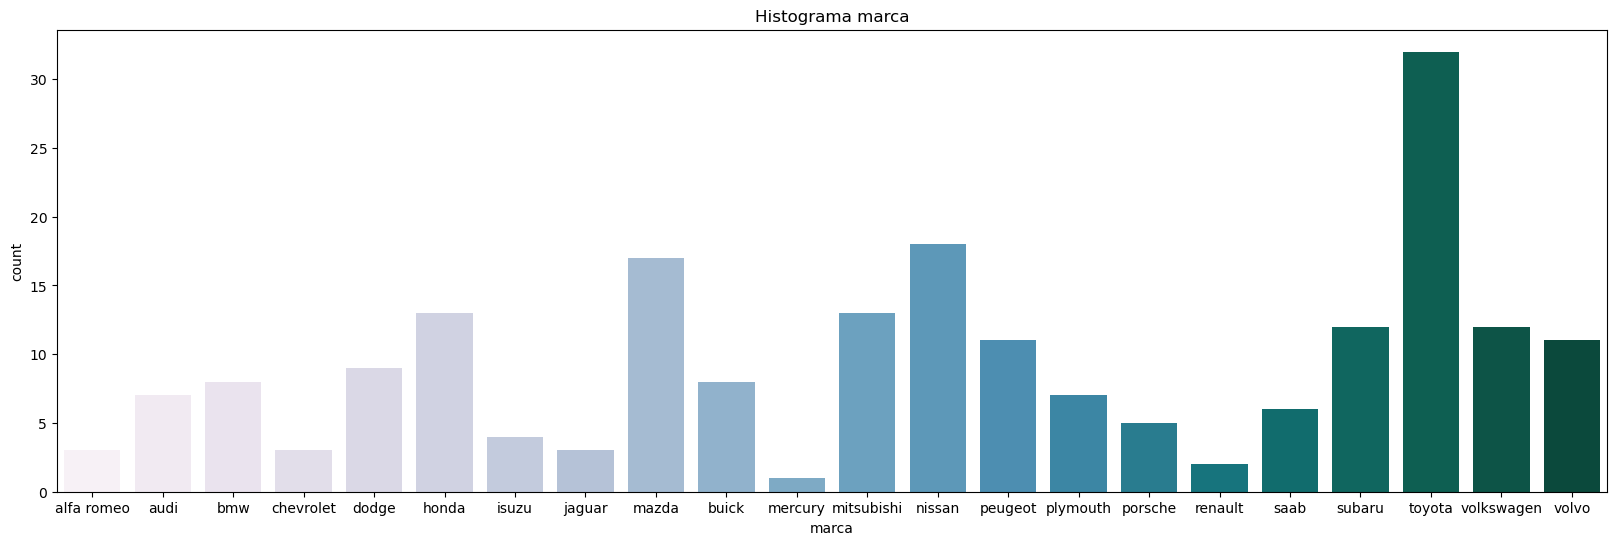

In [46]:
plt.figure(figsize=(20, 6))

plt.title('Histograma marca')
sns.countplot(data=cars, x='marca', palette="PuBuGn")

plt.show()

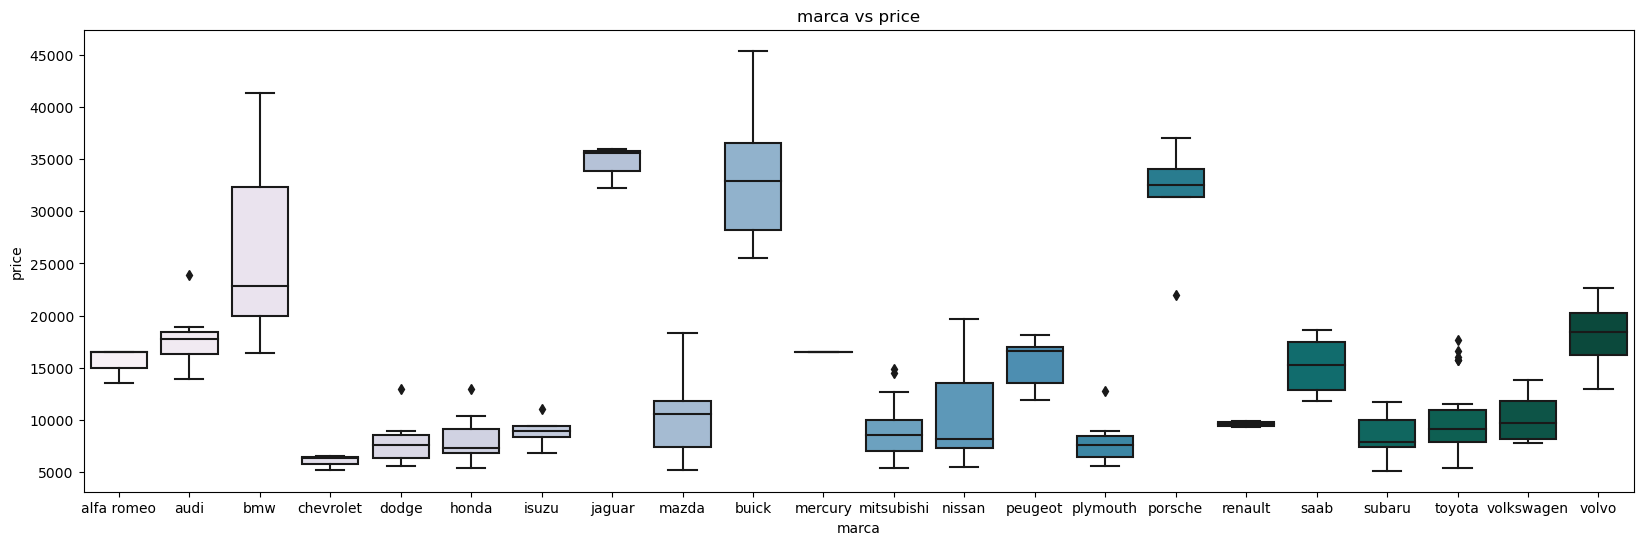

In [47]:
plt.figure(figsize=(20, 6))

plt.title('marca vs price')
sns.boxplot(x=cars.marca, y=cars.price, palette="PuBuGn")

plt.show()

#### Análisis multivariable: 'Price'

#### Matriz de Correlación

<Axes: >

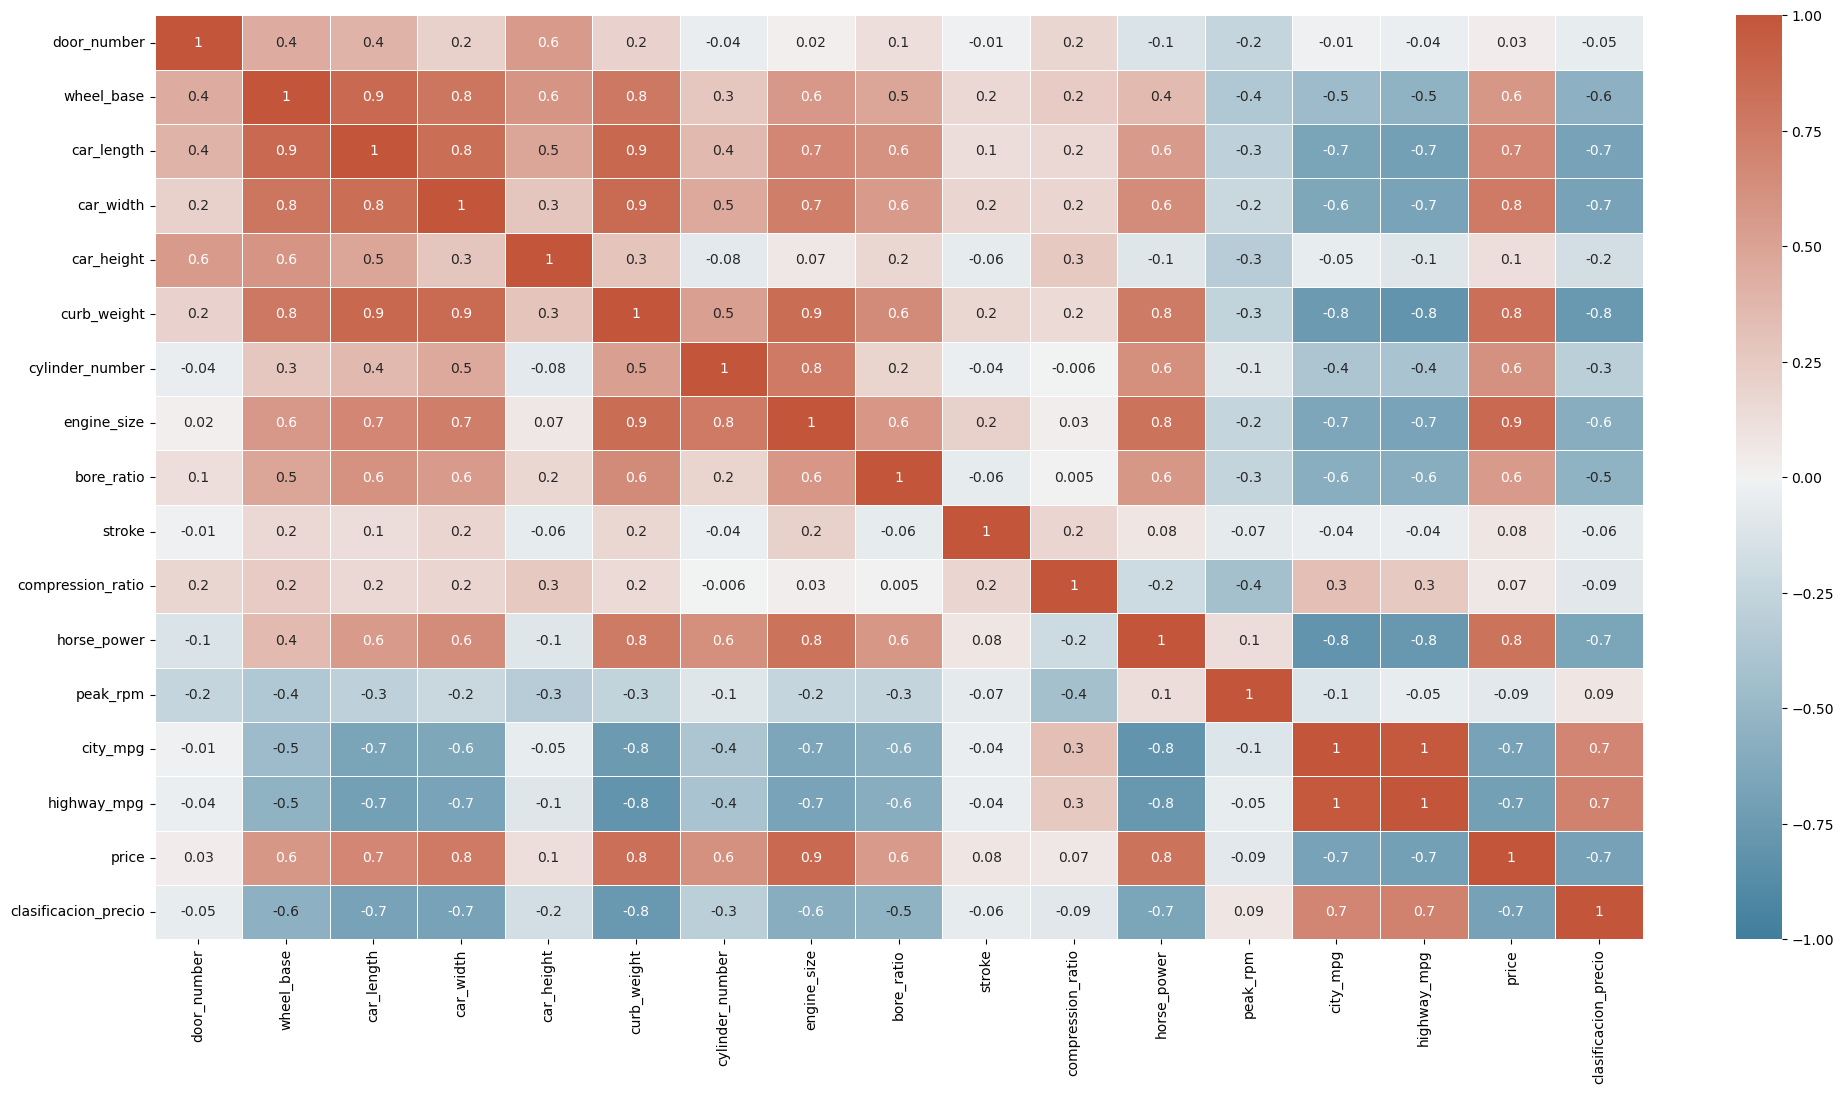

In [9]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

fig, ax = plt.subplots(figsize=(24,12))         # figsize

# Especificar límites para la barra de color
vmin, vmax = -1, 1

sns.heatmap(numeric_columns.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= sns.diverging_palette(230, 20, as_cmap=True), vmin=vmin, vmax=vmax,) # Heatmap for correlation matrix

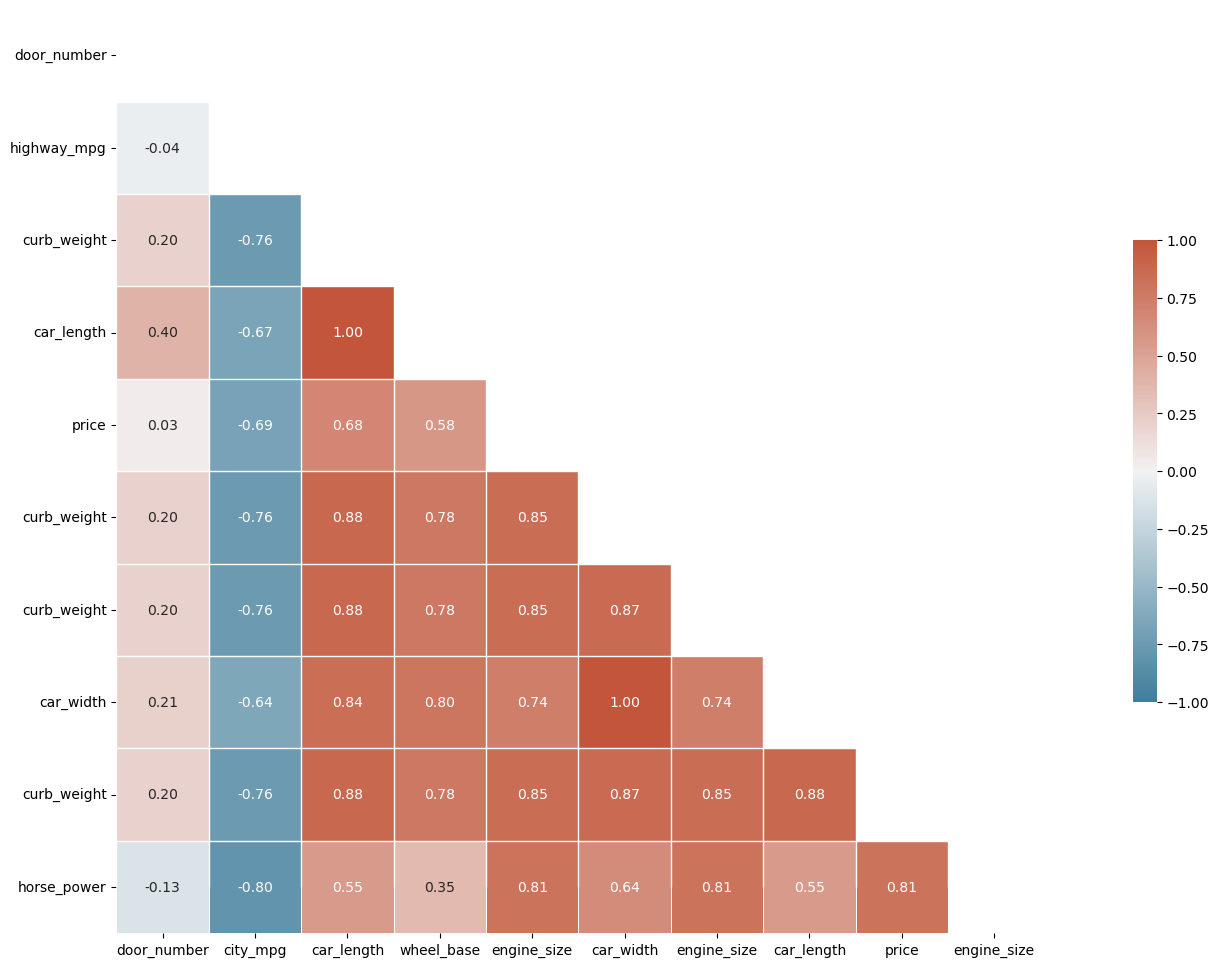

In [7]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Obtener las 10 correlaciones más altas (sin incluir la diagonal principal)
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# Filtrar la matriz de correlación solo para las 10 correlaciones más altas
top_correlation_matrix = correlation_matrix.loc[top_correlations.index.get_level_values(0), top_correlations.index.get_level_values(1)]

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(top_correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crear la figura de matplotlib
fig, ax = plt.subplots(figsize=(24, 12))

# Especificar límites para la barra de color
vmin, vmax = -1, 1

# Crear el heatmap con seaborn
sns.heatmap(top_correlation_matrix, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax,
            center=0, square=True, annot=True, linewidths=.5, fmt='.2f', cbar_kws={"shrink": .5})

# Añadir líneas escalonadas para mejorar la visualización
for i in range(len(top_correlation_matrix)):
    plt.hlines(i, -0.5, len(top_correlation_matrix.columns) - 0.5, colors='white', linewidth=1)
    plt.vlines(i, -0.5, len(top_correlation_matrix.columns) - 0.5, colors='white', linewidth=1)

# Mostrar el gráfico
plt.show()
